In [2]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import seaborn

In [3]:
%matplotlib inline

In [4]:
import zipfile
zipfile.ZipFile('names.zip').extractall('.')

In [5]:
import os
os.listdir('names')

['NationalReadMe.pdf',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt',
 'yob1889.txt',
 'yob1890.txt',
 'yob1891.txt',
 'yob1892.txt',
 'yob1893.txt',
 'yob1894.txt',
 'yob1895.txt',
 'yob1896.txt',
 'yob1897.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1900.txt',
 'yob1901.txt',
 'yob1902.txt',
 'yob1903.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1906.txt',
 'yob1907.txt',
 'yob1908.txt',
 'yob1909.txt',
 'yob1910.txt',
 'yob1911.txt',
 'yob1912.txt',
 'yob1913.txt',
 'yob1914.txt',
 'yob1915.txt',
 'yob1916.txt',
 'yob1917.txt',
 'yob1918.txt',
 'yob1919.txt',
 'yob1920.txt',
 'yob1921.txt',
 'yob1922.txt',
 'yob1923.txt',
 'yob1924.txt',
 'yob1925.txt',
 'yob1926.txt',
 'yob1927.txt',
 'yob1928.txt',
 'yob1929.txt',
 'yob1930.txt',
 'yob1931.txt',
 'yob1932.txt',
 'yob1933.txt',
 'yob1934.txt',
 'yob1935.txt',
 'yob1936.txt',
 'yob1937.txt',
 'yob1938.txt',
 'yob1939.txt',
 'yob1940.txt',
 

In [6]:
open('names/yob2011.txt','r').readlines()[:10]

['Sophia,F,21816\n',
 'Isabella,F,19870\n',
 'Emma,F,18777\n',
 'Olivia,F,17294\n',
 'Ava,F,15480\n',
 'Emily,F,14236\n',
 'Abigail,F,13229\n',
 'Madison,F,12360\n',
 'Mia,F,11512\n',
 'Chloe,F,10970\n']

In [7]:
names2011 = pd.read_csv('names/yob2011.txt')

In [8]:
names2011.head()

,Sophia,F,21816
0,Isabella,F,19870
1,Emma,F,18777
2,Olivia,F,17294
3,Ava,F,15480
4,Emily,F,14236


In [9]:
names2011 = pd.read_csv('names/yob2011.txt',names=['name','sex','number'])

In [10]:
names2011.head()

,name,sex,number
0,Sophia,F,21816
1,Isabella,F,19870
2,Emma,F,18777
3,Olivia,F,17294
4,Ava,F,15480


In [11]:
names_all = []

for year in range(1880,2014+1):
    names_all.append(pd.read_csv('names/yob{}.txt'.format(year),names=['name','sex','number']))
    names_all[-1]['year'] = year

allyears = pd.concat(names_all)

In [12]:
allyears.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [13]:
allyears.tail()

,name,sex,number,year
33039,Zykeem,M,5,2014
33040,Zymeer,M,5,2014
33041,Zymiere,M,5,2014
33042,Zyran,M,5,2014
33043,Zyrin,M,5,2014


In [18]:
# rework data to allow for view of changing indexes
# build a new dataframe and set a new index and sort the date
allyears_indexed = allyears.set_index(['sex', 'name', 'year']).sort_index()
allyears_indexed

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
    Aabriella 2008       5
              2014       5
    Aaden     2009       5
    Aadhira   2012       6
              2013      10
              2014      13
    Aadhya    2007      10
              2008       9
              2009      18
              2010      19
              2011      52
              2012     110
              2013     172
              2014     249
    Aadi      2006       5
              2012       5
              2013       6
    Aadison   2009       6
              2012       5
    Aaditri   2010       5
              2012       5
              2013       6
              2014      10
    Aadrika   2013       5
              2014       5
    Aadvika   2013       6
              2014       7
...                    ...
M   Zyshawn   2008      14
              2009       7
              2010       9
              2011       5
              2012      10
              2013      13
              2014       6
    Zyshon    1998       8
              2001       6
              2005       5
    Zyshonne  1998      26
              1999      30
              2000      17
              2001      12
              2002       9
              2003       7
    Zytaevius 2012       5
    Zytaveon  2011       8
              2014       7
    Zytavion  2011       5
    Zytavious 2002       6
              2004       6
              2005       5
              2006       7
              2007       6
              2009       7
              2010       6
    Zyvion    2009       5
    Zyyon     2014       6
    Zzyzx     2010       5

[1825433 rows x 1 columns]

In [30]:
# loc lets us select any combination of fields for a MULTI-INDEX
# index names are not required, but need to be in sequence
allyears_indexed.loc['F', 'Mary'][-10:]

,number
year,
2005,4447
2006,4081
2007,3673
2008,3490
2009,3154
2010,2862
2011,2701
2012,2565
2013,2632


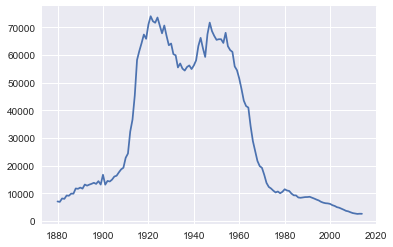

In [25]:
def plotname(sex, name):
    data = allyears_indexed.loc[sex, name]
    pp.plot(data.index, data.values)
    
plotname('F', 'Mary')

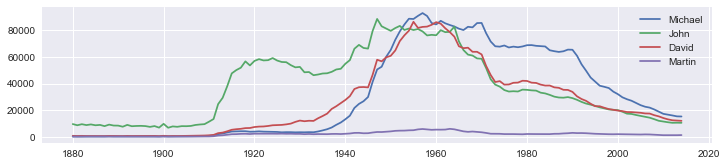

In [35]:
pp.figure(figsize=(12,2.5))
names_m = ['Michael', 'John', 'David', 'Martin']


for pikachu in names_m:
    plotname('M', pikachu)

    
pp.legend(names_m)

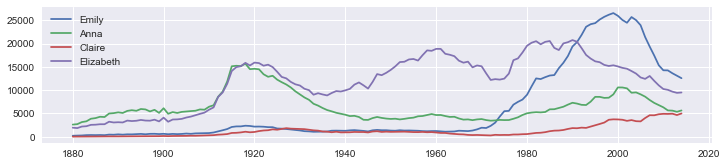

In [39]:
pp.figure(figsize=(12,2.5))
names_f = ['Emily', 'Anna', 'Claire', 'Elizabeth']
for raichu in names_f:
    plotname('F', raichu)
pp.legend(names_f)

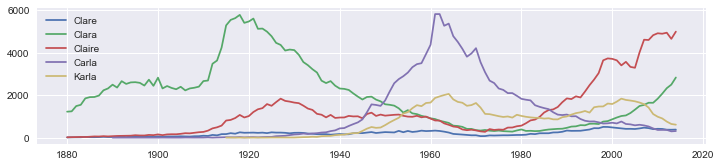

In [41]:
pp.figure(figsize=(12,2.5))
names_f = ['Clare', 'Clara', 'Claire', 'Carla', 'Karla']
for raichu in names_f:
    plotname('F', raichu)
pp.legend(names_f)

In [42]:
# plot as stacked line chart
allyears_indexed.loc['F'].loc[names_f].head(10)

number
name  year        
Carla 1890       5
      1892       6
      1900       6
      1901       8
      1902       6
      1903       5
      1905       5
      1906      10
      1908       7
      1909       8

In [43]:
# unstack the column about to promote the names from INDEX to COLUMN names
allyears_indexed.loc['F'].loc[names_f].unstack(level=0).head()

number                           
name  Carla Claire   Clara Clare Karla
year                                  
1880    NaN   21.0  1226.0  15.0   NaN
1881    NaN   23.0  1242.0  20.0   NaN
1882    NaN   30.0  1490.0  21.0   NaN
1883    NaN   38.0  1548.0  22.0   NaN
1884    NaN   33.0  1852.0  38.0   NaN

In [48]:
variants = allyears_indexed.loc['F'].loc[names_f].unstack(level=0).fillna(0)
variants.head

number                           
name  Carla Claire   Clara Clare Karla
year                                  
1880    0.0   21.0  1226.0  15.0   0.0
1881    0.0   23.0  1242.0  20.0   0.0
1882    0.0   30.0  1490.0  21.0   0.0
1883    0.0   38.0  1548.0  22.0   0.0
1884    0.0   33.0  1852.0  38.0   0.0

In [61]:
variants.index

Int64Index([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
            ...
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
           dtype='int64', name='year', length=135)

TypeError: fill_between() got multiple values for keyword argument 'label'

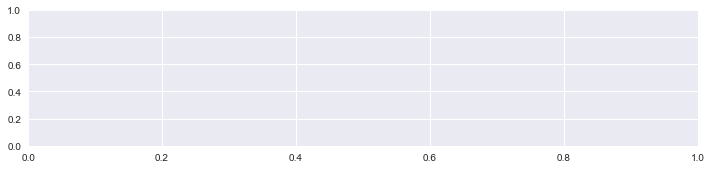

In [62]:
pp.figure(figsize=(12,2.5))
pp.stackplot(variants.index, variants.values.T, label=names)